# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidance to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this intire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to similate what you will face when you are out in the wild. 

Happy Coding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# Importing necessary libraries, reading CSV file, displaying data set and column headers for analysis

air_bnb = pd.read_csv('../projects/AB_NYC_2019.csv')

air_bnb_dict = air_bnb.to_dict()
air_bnb_DF = pd.DataFrame.from_dict(air_bnb_dict)

print(air_bnb_DF.keys())
display(air_bnb_DF)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,7/7/2019,58.50,9,299
1,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,7/7/2019,27.95,9,299
2,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,7/8/2019,20.94,1,134
3,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,7/6/2019,19.75,3,26
4,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,7/8/2019,17.82,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36233195,Welcome home buddies in NYC,121399223,Weifeng,Staten Island,Tompkinsville,40.62830,-74.08645,Private room,60,1,0,NaN,NaN,1,88
48891,36267546,A Home Away From Home,233485864,Jeannie,Staten Island,New Dorp Beach,40.56506,-74.10240,Private room,40,1,0,NaN,NaN,2,341
48892,36270376,"Beautiful home on Staten Island, walk to ferry",444904,Janine,Staten Island,St. George,40.64005,-74.07987,Entire home/apt,100,365,0,NaN,NaN,1,342
48893,36310353,Staten Island Resort minutes from ferry! Amazi...,28586423,Danielle,Staten Island,Stapleton,40.62878,-74.07301,Entire home/apt,450,5,0,NaN,NaN,1,88


,host_name,calculated_host_listings_count
7149,Michael,417
2390,David,403
9795,Sonder (NYC),327
5004,John,294
327,Alex,279


<Axes: title={'center': 'Top 5 Busiest Hosts (Based On # of Listings)'}, xlabel='host_name'>

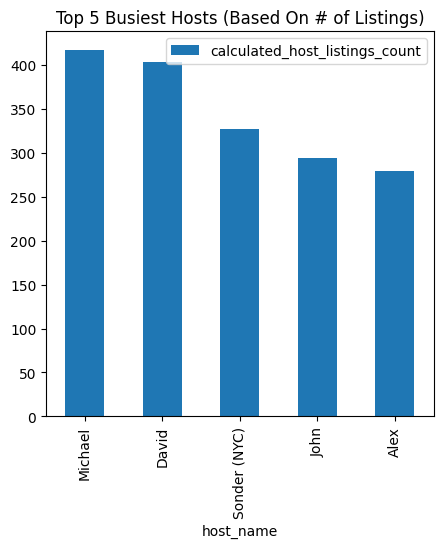

In [203]:
# Which hosts are the busiest and why?

# Identify the hosts with the highest total number of listings
host_rv_df = pd.DataFrame(air_bnb_DF[['host_name','calculated_host_listings_count']])
host_br_gp = host_rv_df.groupby('host_name', as_index=False)['calculated_host_listings_count'].count()

# Create sorted dataframe based on host listings counts from highest to lowest
host_br_df = pd.DataFrame(host_br_gp.sort_values(by='calculated_host_listings_count', ascending=False))
display(host_br_df.head(5))

# Create a dataframe to box plot
host_t5rv_df = pd.DataFrame(host_br_df.sort_values(by='calculated_host_listings_count', ascending=False).head(5))

host_t5rv_df.plot(x="host_name",
                figsize=(5,5),
                kind='bar',
                stacked=False,
                title='Top 5 Busiest Hosts (Based On # of Listings)')

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

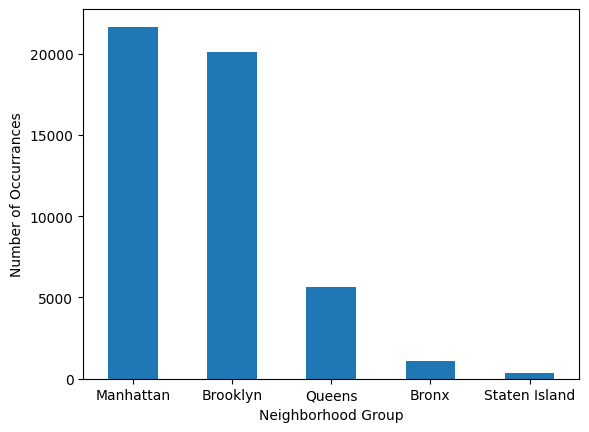

In [205]:
# How many neighborhood groups are available and which shows up the most?

# Create dataframe with neighborhood counts
nbg_df = pd.DataFrame(air_bnb['neighbourhood_group'])
nbg_count = nbg_df['neighbourhood_group'].value_counts()

# Display complete list of neighborhood groups
display(nbg_count)

# Plot number of occurances of neighborhood groups on bar plot
nbg_bar = nbg_count.plot(kind='bar',
                         rot=0,
                         ylabel='Number of Occurrances',
                         xlabel = 'Neighborhood Group',
                         legend = False)


# Unique counts of each neighborhood group:

# Manhatten: 21661
# Brooklyn: 20104
# Queens: 5666
# Bronx: 1091
# Staten Island: 373

# There are 5 neighborhood groups in total, and Manhatten shows up the most.

room_type
Entire home/apt    13199
Private room        7982
Shared room          480
dtype: int64

<Axes: xlabel='Room Type', ylabel='Room Type Count'>

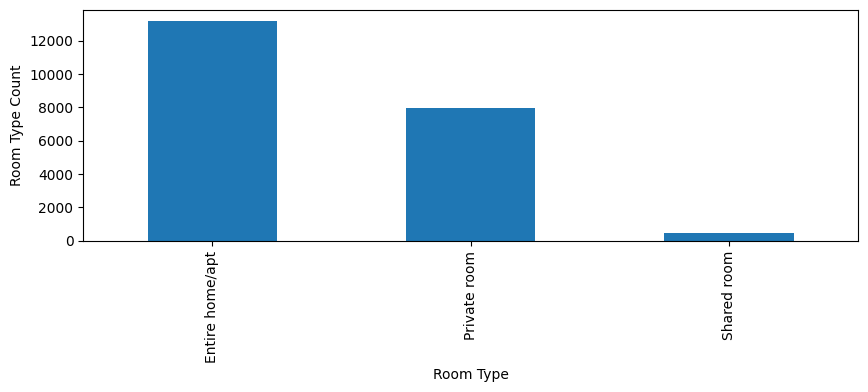

In [208]:
# Are private rooms the most popular in manhattan?

# Create a dataframe with listings only locatedin Manhattan
options = ['Manhattan']
mt_rooms_count = air_bnb_DF[air_bnb_DF['neighbourhood_group'].isin(options)]

# Group by the room type counts
rooms_df = mt_rooms_count.groupby(['room_type']).size()
display(rooms_df)

# Plot on bar chart which rooms are most popular
rooms_df.plot(kind='bar',
              figsize=(10,3),
              ylabel='Room Type Count',
              xlabel = 'Room Type',
              legend = False)

# Unique counts of each room type in Manhattan:

# Entire home/apt: 13199
# Private room: 7982
# Shared room: 480

# Private rooms are NOT the most popular choice in Manhattan. Entire homes/apts are.


,host_name,number_of_reviews
7149,Michael,11081
2390,David,8103
5004,John,7223
4649,Jason,6522
327,Alex,6204


<Axes: title={'center': 'Top 5 Busiest Hosts (Based On # of Reviews)'}, xlabel='host_name'>

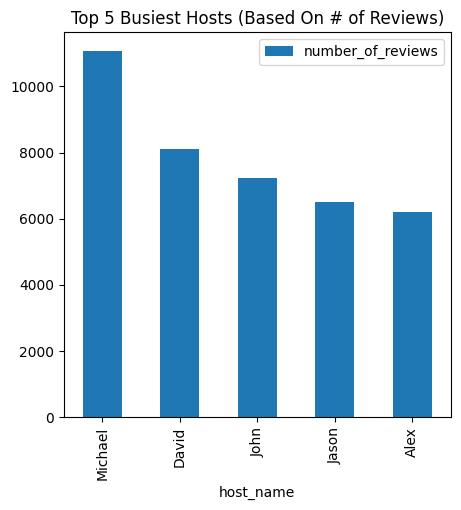

In [211]:
# Which hosts are the busiest based on their reviews?

# Identify the hosts with the highest total number of reviews, than filter down to the top 10 busiest hosts
host_rv_df = pd.DataFrame(air_bnb_DF[['host_name','number_of_reviews']])
host_br_gp = host_rv_df.groupby('host_name', as_index=False)['number_of_reviews'].sum()

# Sort dataframe of hosts based on number of reviews, ascending
host_br_df = pd.DataFrame(host_br_gp.sort_values(by='number_of_reviews', ascending=False))

# Display dataframe
display(host_br_df.head(5))

# Create dataframe for bar chart plotting
host_t5rv_df = pd.DataFrame(host_br_df.sort_values(by='number_of_reviews', ascending=False).head(5))

host_t5rv_df.plot(x="host_name",
                figsize=(5,5),
                kind='bar',
                stacked=False,
                title='Top 5 Busiest Hosts (Based On # of Reviews)')

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


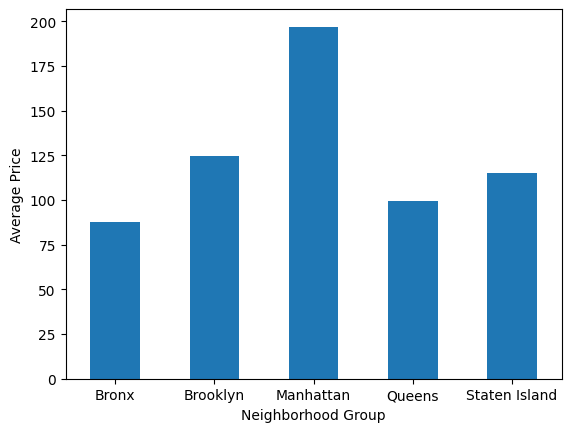

In [213]:
# Which neighorhood group has the highest average price?

# Create dataframe with neighborhood groups and prices
nbg_price_df = pd.DataFrame(air_bnb[['neighbourhood_group','price']])

# Group the DF by neighborhood group averages
nbg_price_grouped = nbg_price_df.groupby('neighbourhood_group').mean()

# Create bar chart displaying data collected
nbg_price_box = nbg_price_grouped.plot(kind='bar',
                                       rot=0,
                                       ylabel='Average Price',
                                       xlabel = 'Neighborhood Group',
                                       legend = False)

display(nbg_price_grouped)

# Mean/average price per rental by neighborhood group:

# Bronx: $87.50
# Brooklyn: $124.48
# Manhattan: $196.88
# Queens: $99.50
# Staten Island: $114.81

# Manhattan has the highest average price of all neighborhood groups at $197.


,price
neighbourhood_group,
Bronx,95459
Brooklyn,2500600
Manhattan,4264527
Queens,563867
Staten Island,42825


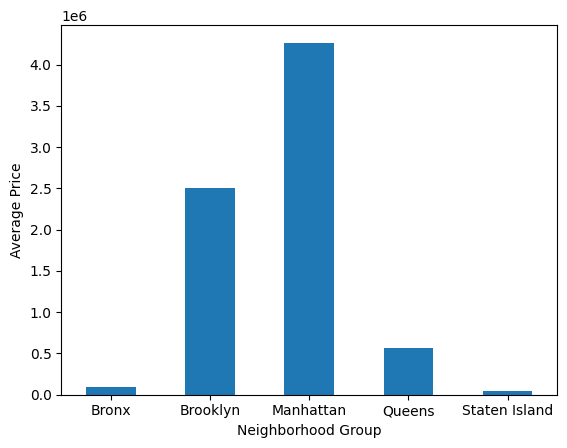

In [217]:
# Which neighbor hood group has the highest total price?

# Create DF with neighborhood group and price
nbg_total_price_df = pd.DataFrame(air_bnb_DF[['neighbourhood_group','price']])

# Group DF by sum of price for each neighborhood group
nbg_total_price_grouped = nbg_total_price_df.groupby('neighbourhood_group').sum()
nbg_total_price_grouped

# Plot DF on bar chart for display
nbg_total_price_grouped.plot(kind='bar',
                             rot=0,
                             ylabel='Average Price',
                             xlabel = 'Neighborhood Group',
                             legend = False)

display(nbg_total_price_grouped)

# Total price of each neighborhood group:

# Bronx: $95,459
# Brooklyn: $2,500,600
# Manhattan: $4,264,527
# Queens: $563,867
# Staten Island: $42,825

# Manhattan has the highest total price of all neighborhood groups at $4,265,527.


,host_name,price
9795,Sonder (NYC),82795
1369,Blueground,70331
7149,Michael,66895
2390,David,65844
327,Alex,52563


<Axes: title={'center': 'Top 5 Highest Total Priced Hosts'}, xlabel='host_name'>

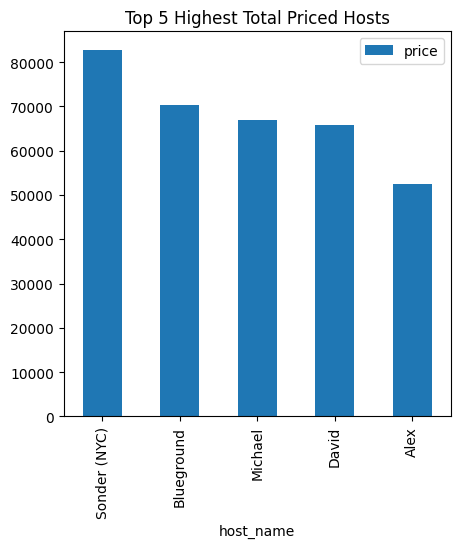

In [160]:
# Which top 5 hosts have the highest total price?

# Create DF wit host names, groups, and prices, then group by the sum of each hosts prices
host_tp_df = pd.DataFrame(air_bnb_DF[['host_name','neighbourhood_group','price']])
host_tp_gp = host_tp_df.groupby('host_name', as_index=False)['price'].sum()

# Sort top 5 hosts based on total price, ascending
display(host_tp_gp.sort_values(by='price', ascending=False).head(5))

# Create Df to bar chart plot
host_t5_df = pd.DataFrame(host_tp_gp.sort_values(by='price', ascending=False).head(5))

host_t5_df.plot(x="host_name",
                figsize=(5,5),
                kind='bar',
                stacked=False,
                title='Top 5 Highest Total Priced Hosts')


In [149]:
# Who currently has no (zero) availability with a review count of 100 or more?

# Filter original DF down to only listings that have 0 availability and at least 100 reviews
nav_reviews = air_bnb_DF[(air_bnb_DF['availability_365'] == 0) & (air_bnb_DF['number_of_reviews'] >= 100)]

display(nav_reviews[['host_name','availability_365','number_of_reviews']])

# There are 162 hosts that currently have 0 availability and over 100 reviews

,host_name,availability_365,number_of_reviews
23,Deloris,0,368
38,Deloris,0,325
57,Mariluz,0,112
89,Stephany,0,131
162,Gurpreet Singh,0,424
...,...,...,...
14625,Ivy,0,115
14733,Lydia,0,107
15239,Karin,0,101
15511,Coral,0,114


In [175]:
# What host has the highest total of prices and where are they located?

# Create a dataframe with host_name and neighborhood group to join on total price dataframe below
host_locs = pd.DataFrame(air_bnb_DF[['host_name', 'neighbourhood_group']])

# Identify the hosts with the highest total price, than filter down to the highest host
host_tp_df = pd.DataFrame(air_bnb_DF[['host_name','price']])
host_tp_gp = host_tp_df.groupby('host_name', as_index=False)['price'].sum()

host_t5_df = pd.DataFrame(host_tp_gp.sort_values(by='price', ascending=False).head(1))

# Merge dataframes to dispay host name, total price, and neighbourhood group
host_t5_df.merge(host_locs,
                 how='inner',
                 on='host_name').head(1)

# Sonder (NYC) has the highest total price at $82,795, located in Manhattan


,host_name,price,neighbourhood_group
0,Sonder (NYC),82795,Manhattan


In [218]:
# When did Danielle from Queens last receive a review?

# Filter down original DF to listings that are only by Danielle in Queens
dq_review = air_bnb_DF[(air_bnb_DF['host_name'] == 'Danielle') & (air_bnb_DF['neighbourhood_group'] == 'Queens')]
dq_review_df = pd.DataFrame(dq_review)

# Display Danielle's most recent review
display(dq_review_df.sort_values(by='last_review', ascending=False).head(1))

# Danielle from Queens last received a rewiew on 7/8/2019

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.7638,-73.87238,Private room,48,1,436,7/8/2019,16.03,5,337


## Further Questions

1. Which host has the most listings?

In [42]:
host_ht_gp = air_bnb_DF[air_bnb_DF.calculated_host_listings_count == air_bnb_DF.calculated_host_listings_count.max()]

display(host_ht_gp[['host_id','host_name','calculated_host_listings_count']].head(1))

# Host ID #219517861 has the most listings at 327 total listings

,host_id,host_name,calculated_host_listings_count
2123,219517861,Sonder (NYC),327


2. How many listings have completely open availability?

In [73]:
# Identify the listings with 365 days of availability
avail_365_gp = air_bnb_DF[air_bnb_DF.availability_365 == air_bnb_DF.availability_365.max()]
avail_365_rs = avail_365_gp[(avail_365_gp['availability_365'] == 365)]
display(avail_365_rs['host_id'].count())

# Approximately 1,295 listings have completely 365 open availability

1295

3. What room_types have the highest review numbers?

In [25]:
# Identify the room type with the highest number of reviews using max()
# Group the room_type together and display final result

rt_rv = air_bnb_DF[air_bnb_DF.room_type == air_bnb_DF.room_type.max()]
rt_rv_gp = rt_rv.groupby('room_type', as_index=False)['number_of_reviews'].max()

display(rt_rv_gp[['room_type','number_of_reviews']])

# The shared room room_type has the highest total number of reviews a 454

,room_type,number_of_reviews
0,Shared room,454


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --

In [ ]:
# While each code block features a small summary of the insights found, a few key things stood out while analyzing this data set:

# 1) Manhattan is by far the most expensive (and most popular) place to reserve an Air BNB
# 2) The busiest locations aren't managed by a person or person(s), but an entity that holds multiple listings
# 3) However, the highest rated places are usually managed by a single person or person(s)
# 4) Most of the highest rated locations and hosts are booked for the entire year